# Correcting absolute hydration free energies using support vector machines

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Path-variables" data-toc-modified-id="Path-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Path variables</a></span></li><li><span><a href="#Logger" data-toc-modified-id="Logger-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logger</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cross validation</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Hyper-parameter-ranges" data-toc-modified-id="Hyper-parameter-ranges-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hyper-parameter ranges</a></span></li><li><span><a href="#SVR-model" data-toc-modified-id="SVR-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>SVR model</a></span></li><li><span><a href="#Training-function" data-toc-modified-id="Training-function-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Training function</a></span></li><li><span><a href="#Perform-training-per-fold" data-toc-modified-id="Perform-training-per-fold-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Perform training per fold</a></span></li></ul></li><li><span><a href="#Hyper-parameter-search-space" data-toc-modified-id="Hyper-parameter-search-space-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyper-parameter search space</a></span><ul class="toc-item"><li><span><a href="#Convergence-plot" data-toc-modified-id="Convergence-plot-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Convergence plot</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>External testing</a></span></li><li><span><a href="#Popagation-of-errors" data-toc-modified-id="Popagation-of-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Popagation of errors</a></span><ul class="toc-item"><li><span><a href="#Avg.-err." data-toc-modified-id="Avg.-err.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Avg. err.</a></span></li><li><span><a href="#RMS" data-toc-modified-id="RMS-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>RMS</a></span></li><li><span><a href="#AUE" data-toc-modified-id="AUE-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>AUE</a></span></li><li><span><a href="#Kendall-$\tau$" data-toc-modified-id="Kendall-$\tau$-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Kendall $\tau$</a></span></li><li><span><a href="#Pearson-R" data-toc-modified-id="Pearson-R-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Pearson R</a></span></li><li><span><a href="#Mean-absolute-error" data-toc-modified-id="Mean-absolute-error-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>Mean absolute error</a></span></li><li><span><a href="#Linear-combination" data-toc-modified-id="Linear-combination-9.7"><span class="toc-item-num">9.7&nbsp;&nbsp;</span>Linear combination</a></span></li><li><span><a href="#Load-testing-data" data-toc-modified-id="Load-testing-data-9.8"><span class="toc-item-num">9.8&nbsp;&nbsp;</span>Load testing data</a></span><ul class="toc-item"><li><span><a href="#FreeSolve-database" data-toc-modified-id="FreeSolve-database-9.8.1"><span class="toc-item-num">9.8.1&nbsp;&nbsp;</span>FreeSolve database</a></span></li><li><span><a href="#External-test-set" data-toc-modified-id="External-test-set-9.8.2"><span class="toc-item-num">9.8.2&nbsp;&nbsp;</span>External test set</a></span><ul class="toc-item"><li><span><a href="#FreeSolve-format" data-toc-modified-id="FreeSolve-format-9.8.2.1"><span class="toc-item-num">9.8.2.1&nbsp;&nbsp;</span>FreeSolve format</a></span></li><li><span><a href="#Features-and-labels-format" data-toc-modified-id="Features-and-labels-format-9.8.2.2"><span class="toc-item-num">9.8.2.2&nbsp;&nbsp;</span>Features and labels format</a></span></li></ul></li></ul></li><li><span><a href="#Original-$\Delta-G_{hydr}$" data-toc-modified-id="Original-$\Delta-G_{hydr}$-9.9"><span class="toc-item-num">9.9&nbsp;&nbsp;</span>Original $\Delta G_{hydr}$</a></span></li><li><span><a href="#Predict-$\Delta-G_{offset}$" data-toc-modified-id="Predict-$\Delta-G_{offset}$-9.10"><span class="toc-item-num">9.10&nbsp;&nbsp;</span>Predict $\Delta G_{offset}$</a></span></li><li><span><a href="#$\Delta-G_{hydr}$-correction" data-toc-modified-id="$\Delta-G_{hydr}$-correction-9.11"><span class="toc-item-num">9.11&nbsp;&nbsp;</span>$\Delta G_{hydr}$ correction</a></span></li></ul></li><li><span><a href="#Removing-outlier" data-toc-modified-id="Removing-outlier-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Removing outlier</a></span></li><li><span><a href="#Recreating-SAMPL4-Figure-1" data-toc-modified-id="Recreating-SAMPL4-Figure-1-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Recreating SAMPL4 Figure 1</a></span><ul class="toc-item"><li><span><a href="#Avg.-err." data-toc-modified-id="Avg.-err.-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Avg. err.</a></span></li><li><span><a href="#RMS" data-toc-modified-id="RMS-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>RMS</a></span></li><li><span><a href="#MAE-or-AUE?" data-toc-modified-id="MAE-or-AUE?-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>MAE or AUE?</a></span></li><li><span><a href="#tau" data-toc-modified-id="tau-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>tau</a></span></li><li><span><a href="#R" data-toc-modified-id="R-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>R</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import csv
import time
import shutil
import logging
import pickle
import statistics
from tqdm import tqdm_notebook as tqdm

# SVM:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# SciKit-Optimise:
from skopt import gp_minimize, dump
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Statistics:
import scipy
from uncertainties import unumpy
import itertools
itertools.imap = lambda *args, **kwargs: list(map(*args, **kwargs))

/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
# Global variables:
model_type = 'SVM'
kernel = 'rbf'
label_col = 'dGoffset (kcal/mol)'

# set data processing configurations:
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
best_mae = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance

# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

colour1 = 'darkgray'
colour2 = 'green'
colour3 = 'lightsteelblue'

## Path variables

In [3]:
# Path variables:
path = './'
datasets_dr = '../datasets/'
SDF_dr = datasets_dr + 'sdffiles/'
output_dr = path + 'output' + '_' + kernel + '/'
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
figures_dr = path + 'figures' + '_' + kernel + '/'
if not os.path.exists(figures_dr):
    os.mkdir(figures_dr)
freesolv_loc = datasets_dr + 'freesolv_database.txt'

## Logger

In [4]:
# clean slate output_dr
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)

# initiate log file
logging.basicConfig(filename= output_dr + 'dGhydr_' + model_type + '.log',
                    filemode='a',
                    format='%(asctime)s - %(message)s',
                    level=logging.INFO)

logging.info('Starting {}.ipynb.'.format(os.path.abspath('')))
logging.info('\n\nParameters:\n\nn_calls = {}  # gp_minimize\nn_splits = {}  # Kfolds\n'.format(n_calls, n_splits))

## Data preparation

### Load data

In [5]:
train_df = pd.read_csv(datasets_dr + 'train_data.csv', index_col='ID').iloc[:,:-1]
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
ID,,,,,,,,,,,,,,,,,,,,,
mobley_1017962,1.781592,-9.059647,3.780119,-1.056808,-1.528974,1.154161,2.361153,-2.700138,-5.169281,-2.558583,...,0.176910,0.448660,-0.481919,-0.730970,1.433422,-0.871800,-0.046023,0.146078,-0.985729,0.81
mobley_1019269,-15.261008,-4.347183,1.379246,0.645708,1.531135,0.856268,2.825631,1.283684,-3.142267,-1.366230,...,0.650525,-0.065040,-0.539433,0.367840,0.331124,0.003756,-0.432505,-0.340372,0.021577,-1.49
mobley_1034539,36.296153,18.307947,-16.146556,9.478137,5.356792,-1.551679,8.356573,-6.716154,-1.947512,7.365367,...,0.168824,0.777216,1.135480,0.712777,-0.498693,0.691487,-1.452439,0.096043,-1.621214,-1.96
mobley_1036761,-7.287637,-6.559314,-4.371576,-0.002275,1.794860,5.108000,0.532538,-1.465378,-2.029966,-1.791384,...,0.644729,0.141384,2.021007,0.251282,-0.186177,0.216360,-2.022736,-0.802692,-0.227339,-0.64
mobley_1046331,0.013096,5.160060,-0.553108,-8.828100,-1.271934,-2.744112,1.456818,0.573025,-3.004421,-1.923495,...,-0.823191,0.277780,1.177761,-0.455553,0.149812,-0.992073,-0.448685,-0.195229,0.616093,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_9913368,-20.236474,9.027594,-0.488696,6.984286,2.903779,-4.453868,1.557532,1.482581,-0.569213,-0.728069,...,0.662516,0.124512,-1.252097,0.093136,0.964358,1.117784,-0.596488,0.125104,-0.104126,-1.80
mobley_9942801,0.465744,-3.377600,-9.321441,-5.431455,0.795493,0.275491,-3.901344,-1.813911,3.214033,0.992900,...,0.550031,-0.060056,0.567654,0.528096,0.281406,-0.258472,0.607825,0.480860,-0.378041,-0.38
mobley_994483,-23.790773,3.251655,-1.631419,11.152238,3.508680,-7.857823,-2.714649,3.183763,0.001303,-1.865963,...,0.202422,-0.385468,0.059621,-1.176402,0.542244,0.026653,-1.198516,-0.103893,0.185989,-1.23


### Cross validation

In [6]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    logging.info('Performing {}-fold cross-validation...'.format(n_splits))

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    kfolds = []
    global offset_col_name

    for train, validate in kf.split(dataset):
        training = dataset.iloc[train]
        train_labels = training[label_col]
        train_set = training.drop(label_col, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[label_col]
        validate_set = validating.drop(label_col, axis=1)

        kfolds.append(
            [[train_set, validate_set],
             [train_labels, validate_labels]]
        )

    with open(path + 'kfolds.json', "wb") as f:
        pickle.dump(kfolds, f)

    logging.info('Pickled kfolds nested list at {}kfolds.json.'.format(path))
    return kfolds

In [7]:
# call function
kfolds = split_dataset(train_df, n_splits, random_state)

## Training

In [8]:
# init training statistics logger
mae_logger = output_dr + model_type + '_statistics.csv'
with open(mae_logger, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['Fold', 'MAE (kcal/mol)', 'Parameters'])

### Hyper-parameter ranges

In [9]:
# set hyper-parameter ranges, append to list
dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

# gp_minimize dimensions
dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]

### SVR model

In [10]:
def create_model(param_gamma, param_C, param_epsilon):
    """Returns a SVR class instance."""
    
    return SVR(kernel=kernel,
               gamma=param_gamma,
               C=param_C,
               epsilon=param_epsilon,
               verbose=False)

### Training function

In [11]:
class tqdm_skopt(object):
    """tqdm implementation for skopt.gp_minimize"""
    def __init__(self, **kwargs):
        self._bar = tqdm(**kwargs)
        
    def __call__(self, res):
        self._bar.update()

In [12]:
def train_model(fold, fold_num):
    """
    1. Unpack data.
    2. Define fitness function for guassian process optmisation.
    3. Decorate fitness with pre-defined hyper-parameter ranges.
    4. Return and pickle final gp_minimize object.
    """
    logging.info('Started training fold {}...'.format(str(fold_num)))

    # retrieve data sets and convert to numpy array
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # define function for gaussian process optimisation
    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Function for gaussian process optmisation."""

        # create SVR model
        model = create_model(param_C, param_gamma, param_epsilon)

        # train model on training data
        model.fit(train_X, train_y)

        # validate model
        predicted_y = model.predict(validate_X)
        mae = mean_absolute_error(validate_y, predicted_y)

        # update statistics
        with open(output_dr + model_type + '_statistics.csv', 'a') as file:
            writer = csv.writer(file)
            writer.writerow([fold_num, mae, [param_gamma, param_gamma, param_epsilon]])

        # check if model improves
        global best_mae
        if mae < best_mae:
            # update new model accuracy.
            best_mae = mae
            # overwrite model if mae improves
            pkl_file = output_dr + 'fold_' + str(fold_num) + '_' + model_type + '_model.pickle'
            with open(pkl_file, 'wb') as file: pickle.dump(model, file)
            logging.info('Saved {}.'.format(pkl_file))

        # reset best MAE
        best_mae = np.inf
        
        return mae
    
    # starting parameters
    default_parameters = [1.0, 1.0, 1.0]
    # optimise hyper-parameters
    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI',  # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters,
                                verbose=False,
                                callback=[tqdm_skopt(total=n_calls, desc='Fold {}'.format(fold_num))])

    # save skopt object and analyse in a separate script as
    logging.info('Saved {}fold_{}_gp_minimize_result.pickle.'.format(output_dr, fold_num))

    logging.info('Finished training fold {}: {}.'.format(str(fold_num), search_result.x))
    return search_result

### Perform training per fold

In [13]:
# call train_model save gp_minimize objects to lsit
gp_results = [train_model(fold, fold_num + 1) for fold_num, fold in enumerate(kfolds)]

/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


## Hyper-parameter search space

### Convergence plot

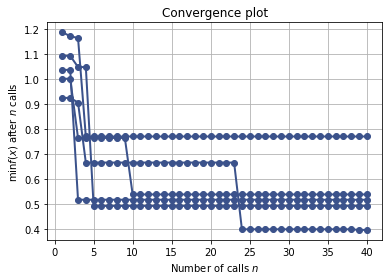

In [14]:
for result in gp_results: plot_convergence(result)
plt.savefig(figures_dr + 'convergence_plot.png')

## External testing

## Popagation of errors

### Avg. err.

In [15]:
def avg_err(x, y):
    """Returns an averaged error between two lists.
    Assumes len(x) == len(y)."""
    err = [i - j for i, j in zip(x, y)]
    return sum(err) / len(err)

### RMS

$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_{i} - y_{i})^{2}}
$

In [16]:
def rmse(x, y):
    """Returns the root means squared error of two lists.
    Assumes len(x) == len(y)"""
    num = sum([(i - j)**2 for i, j in zip(x, y)])
    den = len(x)
    return (num / den)**0.5

### AUE

### Kendall $\tau$

In [17]:
def kendall_tau(x, y):
    tau, p_value = scipy.stats.kendalltau(x, y)
    return tau

### Pearson R


$
  r =
  \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$

In [18]:
def calc_pearson_r(x, y):
    """
    Calculates Pearson R value.
    Assumes len(x) == len(y).
    Parameters
    ----------
    x: array like of uncertainties.core.Variable
    y: array like of uncertainties.core.Variable
    ----------
    Returns array like of uncertainties.core.Variable
    """
    n = len(x)  # number of samples
    try:
        x_norm = [i.n for i in x]  # x without uncertainty
        y_norm = [i.n for i in y]  # y without uncertainty
    except AttributeError:
        x_norm = x
        y_norm = y
    sum_x = float(sum(x_norm))  # sum of x
    sum_y = float(sum(y_norm))  # sum of y
    sum_x_sq = sum(itertools.imap(lambda x: pow(x, 2), x))  # sum of x**2
    sum_y_sq = sum(itertools.imap(lambda x: pow(x, 2), y))  # sum of y**2
    psum = sum(itertools.imap(lambda x, y: x * y, x, y))  # sum of x*y
    num = psum - (sum_x * sum_y/n)  # Pearson R equation numerator
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)  # Pearson R formular demoninator
    if den == 0: return 0  # Prevent division by zero
    return num / den

### Mean absolute error


$
<insert \: formula>
$

In [19]:
def calc_mae(x, y):
    """Returns list of mean absolute error between two lists.
    Assumes len(x) == len(y)."""
    ae = [abs(i - j) for i, j in zip(x, y)]
    return sum(ae) / len(ae)

### Linear combination

In [20]:
def sum_error(error1, error2):
    """Returns sum propagated error between two int or floats."""
    return (error1 ** 2 + error2 ** 2) ** 0.5

In [21]:
def plot_scatter(calc, exp, title, x_label, y_label, colour):
    """
    Returns and saves linear regression scatter plot.
    Parameters
    ----------
    calc: (list) [values, errors] calculated or predicted data with associated errors.
    exp: (list) [values, errors] true or experimental data with associated errors.
    title: (str) plot title and filename delimitted by underscores. Avoid special characters.
    x_label: (str) x-axis label.
    y_label: (str) y-axis label.
    """
    
    # regular floats
    x = calc[0]
    y = exp[0]
    
    # plot scatter
    plt.figure()
#     plt.scatter(x, y, color='black', s=8)
    plt.scatter(x, y, color=colour, s=8)

    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x),
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
             color='black', linewidth=1)

    # axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # figure title
    plt.title(title)

    # create uncertainties.core.Variable for statistical analysis
    xu = unumpy.uarray(calc[0], calc[1])
    yu = unumpy.uarray(exp[0], exp[1])
    
    # mean absolute error
    mae = calc_mae(xu, yu)
    
    # Pearson R and R-squared
    r_value = calc_pearson_r(xu, yu)
    r2 = r_value**2

    # annotate with r-squared and MAE
    string = 'MAE = {}\nR$^2$ = {}\nR = {}'.format(mae, r2, r_value).replace('+/-', '$\pm$')
    plt.annotate(string, xy=(0, 1), xytext=(12, -12), va='top',
                 xycoords='axes fraction', textcoords='offset points')

    filename = figures_dr + str(title).lower().replace(' ', '_') + '.png'
    plt.savefig(filename)
    logging.info('Saved {}.'.format(filename))

### Load testing data

#### FreeSolve database

In [22]:
# load freesolv
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python', index_col='compound id (and file prefix)').sort_index()

#### External test set

##### FreeSolve format

In [23]:
# experimental and calculated hydration free energies
test_exp = freesolv_df.loc[freesolv_df.iloc[:, 6] == 'SAMPL4_Guthrie','experimental value (kcal/mol)'].sort_index()
test_calc = freesolv_df.loc[freesolv_df.iloc[:, 6] == 'SAMPL4_Guthrie','Mobley group calculated value (GAFF) (kcal/mol)'].sort_index()
# associated uncertainties
test_exp_u = freesolv_df.loc[freesolv_df.iloc[:, 6] == 'SAMPL4_Guthrie','experimental uncertainty (kcal/mol)'].sort_index()
test_calc_u = freesolv_df.loc[freesolv_df.iloc[:, 6] == 'SAMPL4_Guthrie','calculated uncertainty (kcal/mol)'].sort_index()

##### Features and labels format

In [24]:
# external test set features and labels
test_X = pd.read_csv(datasets_dr + 'test_data.csv', index_col='ID').iloc[:,:-2].sort_index()
test_y = pd.read_csv(datasets_dr + 'test_data.csv', index_col='ID').iloc[:,-2:-1].sort_index()
# propagated error of dGoffset label
test_y_u = pd.read_csv(datasets_dr + 'test_data.csv', index_col='ID').iloc[:,-1].sort_index()

### Original $\Delta G_{hydr}$

[-20, 2.5, -25, 2.5]

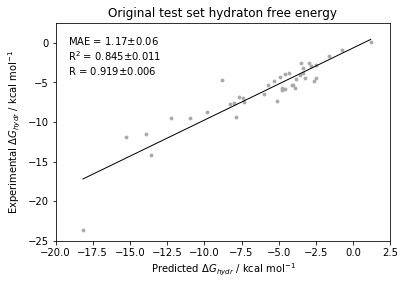

In [25]:
plot_scatter(calc=[test_calc, test_calc_u],
             exp=[test_exp, test_exp_u],
             title='Original test set hydraton free energy',
             x_label='Predicted $\Delta G_{hydr}$ / kcal mol$^{-1}$',
             y_label='Experimental $\Delta G_{hydr}$ / kcal mol$^{-1}$',
             colour=colour1)

plt.axis([-20, 2.5, -25, 2.5])

### Predict $\Delta G_{offset}$

In [26]:
def model_predict(model_num, test_entry):
    """Load model from pickle and return model prediction on a given test_entry."""

    with open(output_dr + 'fold_' + str(model_num) + '_' + model_type + '_model.pickle', 'rb') as f:
        model = pickle.load(f)

    return model.predict(test_entry)

In [27]:
# ML predicted labels nested list per fold
predict_per_fold = [model_predict(fold_num, test_X.to_numpy()) for fold_num in range(1, n_splits + 1)]
# average ML predicted labels
predict_y = np.average(predict_per_fold, axis=0)
# convert np array to float
predict_y = [float(x) for x in predict_y]
# standard deviation
predict_std = np.std(predict_per_fold, axis=0)

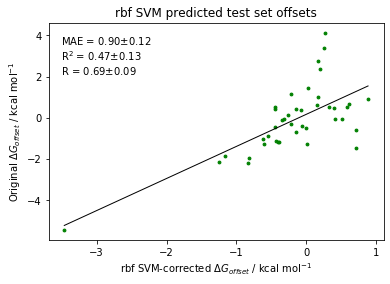

In [28]:
plot_scatter(calc=[predict_y, predict_std],
             exp=[test_y['dGoffset (kcal/mol)'].tolist(), test_y_u.tolist()],
             title=kernel + ' SVM predicted test set offsets',
             x_label=kernel + ' SVM-corrected $\Delta G_{offset}$ / kcal mol$^{-1}$',
             y_label='Original $\Delta G_{offset}$ / kcal mol$^{-1}$',
             colour=colour2)

### $\Delta G_{hydr}$ correction

In [29]:
test_corr = [offset + calc for offset, calc in zip(predict_y, test_calc)]
test_corr_u = [sum_error(x, y) for x, y in zip(predict_std.tolist(), test_calc_u.tolist())]

In [30]:
print('avg. err. =', avg_err(test_corr, test_exp.tolist()))
print('RMSE =', rmse(test_corr, test_exp.tolist()))
print('MAE =', calc_mae(test_corr, test_exp.tolist()))
print('Kendall tau =', kendall_tau(test_corr, test_exp.tolist()))
print('Pearson R =', calc_pearson_r(test_corr, test_exp.tolist()))

avg. err. = -0.06977523763835895
RMSE = 1.24723200145719
MAE = 0.9040744050530524
Kendall tau = 0.8292682926829269
Pearson R = 0.95482581414447


In [31]:
corr_u = unumpy.uarray(test_corr, test_corr_u)
exp_u = unumpy.uarray(test_exp.tolist(), test_exp_u.tolist())

print('avg. err. =', avg_err(corr_u, exp_u))
print('RMSE =', rmse(corr_u, exp_u))
print('MAE =', calc_mae(corr_u, exp_u))
print('Kendall tau =', kendall_tau(corr_u, exp_u))
print('Pearson R =', calc_pearson_r(corr_u, exp_u))

svm_stats = {'FEP+ML': [-0.03, 0.11, 1.22, 0.13, 0.87, 0.11, 0.84, 0, 0.96, 0.01, 0, 0, 0, 0]}

avg. err. = -0.07+/-0.12
RMSE = 1.25+/-0.15
MAE = 0.90+/-0.12
Kendall tau = 0.8292682926829269
Pearson R = 0.955+/-0.016


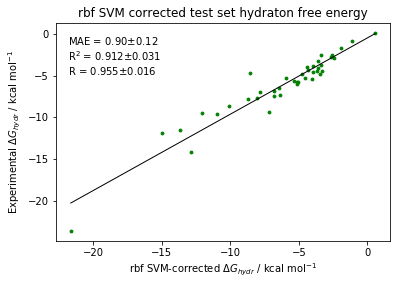

In [32]:
plot_scatter(calc=[test_corr, test_corr_u],
             exp=[test_exp.tolist(), test_exp_u.tolist()],
             title=kernel + ' SVM corrected test set hydraton free energy',
             x_label=kernel + ' SVM-corrected $\Delta G_{hydr}$ / kcal mol$^{-1}$',
             y_label='Experimental $\Delta G_{hydr}$ / kcal mol$^{-1}$',
             colour=colour2)

In [33]:
def plot_scatter_errorbar(calc, exp, title, x_label, y_label):
    """
    Returns and saves linear regression scatter plot with x-direction error bars.
    Parameters
    ----------
    calc: (list) [values, errors] calculated or predicted data with associated errors.
    exp: (list) [values, errors] true or experimental data with associated errors.
    title: (str) plot title and filename delimitted by underscores. Avoid special characters.
    x_label: (str) x-axis label.
    y_label: (str) y-axis label.
    """
    
    # regular floats
    x = calc[0]
    y = exp[0]
    
    # plot scatter
    plt.figure()
    plt.scatter(x, y, color='black', s=8)
    
    # add error bars
    plt.errorbar(x, y, xerr=calc[1], color='black', linestyle="None")

    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x),
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
             color='black', linewidth=1)

    # axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # figure title
    plt.title(title)

    # create uncertainties.core.Variable for statistical analysis
    xu = unumpy.uarray(calc[0], calc[1])
    yu = unumpy.uarray(exp[0], exp[1])
    
    # mean absolute error
    mae = calc_mae(xu, yu)
    
    # Pearson R and R-squared
    r_value = calc_pearson_r(xu, yu)
    r2 = r_value**2

    # annotate with r-squared and MAE
    string = 'MAE = {}\nR$^2$ = {}\nR = {}'.format(mae, r2, r_value).replace('+/-', '$\pm$')
    plt.annotate(string, xy=(0, 1), xytext=(12, -12), va='top',
                 xycoords='axes fraction', textcoords='offset points')

    filename = figures_dr + str(title).lower().replace(' ', '_') + '.png'
    plt.savefig(filename)
    logging.info('Saved {}.'.format(filename))

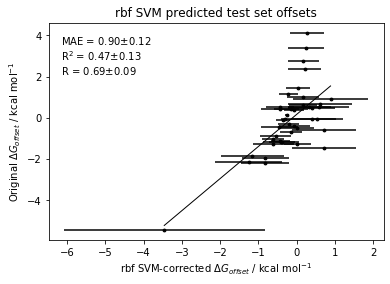

In [34]:
plot_scatter_errorbar(calc=[predict_y, predict_std],
                      exp=[test_y['dGoffset (kcal/mol)'].tolist(), test_y_u.tolist()],
                      title=kernel + ' SVM predicted test set offsets',
                      x_label=kernel + ' SVM-corrected $\Delta G_{offset}$ / kcal mol$^{-1}$',
                      y_label='Original $\Delta G_{offset}$ / kcal mol$^{-1}$')

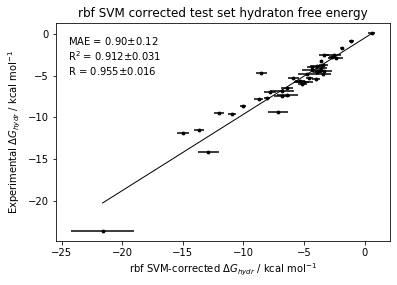

In [35]:
plot_scatter_errorbar(calc=[test_corr, test_corr_u],
                      exp=[test_exp.tolist(), test_exp_u.tolist()],
                      title=kernel + ' SVM corrected test set hydraton free energy',
                      x_label=kernel + ' SVM-corrected $\Delta G_{hydr}$ / kcal mol$^{-1}$',
                      y_label='Experimental $\Delta G_{hydr}$ / kcal mol$^{-1}$')



## Removing outlier

How does removing mobley_4587267 from the training and testing affect the result?

In [36]:
test_X_o = test_X.iloc[test_X.index != 'mobley_4587267', :]
test_y_u = pd.DataFrame(test_y_u)

test_calc = pd.DataFrame(test_calc)
test_calc_o = test_calc.iloc[test_calc.index != 'mobley_4587267', :]
test_calc_u = pd.DataFrame(test_calc_u)
test_calc_uo = test_calc_u.iloc[test_calc_u.index != 'mobley_4587267', :]

test_exp = pd.DataFrame(test_exp)
test_exp_o = test_exp.iloc[test_exp.index != 'mobley_4587267', :]
test_exp_u = pd.DataFrame(test_exp_u)
test_exp_uo = test_exp_u.iloc[test_exp_u.index != 'mobley_4587267', :]

test_y_o = test_y.iloc[test_y.index != 'mobley_4587267', :]
test_y_uo = test_y_u.iloc[test_y_u.index != 'mobley_4587267', :]

In [37]:
# ML predicted labels nested list per fold
predict_per_fold_o = [model_predict(fold_num, test_X_o.to_numpy()) for fold_num in range(1, n_splits + 1)]
# average ML predicted labels
predict_y_o = np.average(predict_per_fold_o, axis=0)
# convert np array to float
predict_y_o = [float(x) for x in predict_y_o]
# standard deviation
predict_std_o = np.std(predict_per_fold_o, axis=0)

In [38]:
test_corr_o = [offset + calc for offset, calc in zip(predict_y_o, test_calc_o.iloc[:, 0])]
test_corr_uo = [sum_error(x, y) for x, y in zip(predict_std_o.tolist(), test_calc_uo.iloc[:, 0].tolist())]

[-20, 2.5, -25, 2.5]

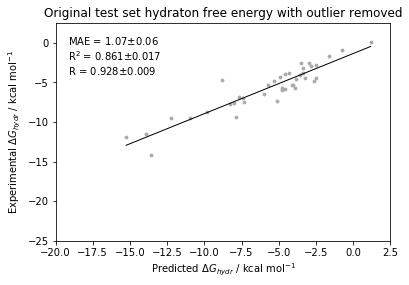

In [39]:
plot_scatter(calc=[test_calc_o.iloc[:, 0], test_calc_uo.iloc[:, 0]],
             exp=[test_exp_o.iloc[:, 0], test_exp_uo.iloc[:, 0]],
             title='Original test set hydraton free energy with outlier removed',
             x_label='Predicted $\Delta G_{hydr}$ / kcal mol$^{-1}$',
             y_label='Experimental $\Delta G_{hydr}$ / kcal mol$^{-1}$',
             colour=colour1)

plt.axis([-20, 2.5, -25, 2.5])

[-20, 2.5, -25, 2.5]

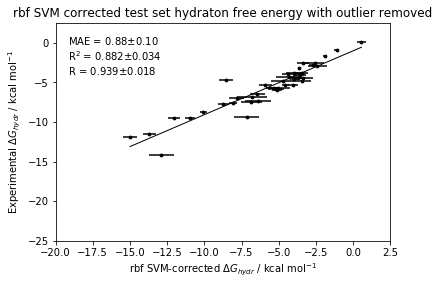

In [40]:
plot_scatter_errorbar(calc=[test_corr_o, test_corr_uo],
                      exp=[test_exp_o.iloc[:, 0], test_exp_uo.iloc[:, 0]],
                      title=kernel + ' SVM corrected test set hydraton free energy with outlier removed',
                      x_label=kernel + ' SVM-corrected $\Delta G_{hydr}$ / kcal mol$^{-1}$',
                      y_label='Experimental $\Delta G_{hydr}$ / kcal mol$^{-1}$')

plt.axis([-20, 2.5, -25, 2.5])

## Recreating SAMPL4 Figure 1

In [41]:
table3 = pd.read_csv(datasets_dr + 'table_3.csv', index_col='ID')
table3

,Avg. err.,error,RMS,error1,AUE,error2,tau,error3,R,error4,Err. slope,error5,Max. err.,error6
ID,,,,,,,,,,,,,,
004,0.13,0.13,1.40,0.12,1.10,0.10,0.73,0.06,0.93,0.02,0.99,0.07,4.98,0.47
005,-0.42,0.18,1.22,0.15,0.96,0.12,0.78,0.06,0.96,0.01,1.06,0.05,1.81,0.67
014,1.11,0.57,3.07,0.72,1.90,0.51,0.36,0.15,0.71,0.26,1.01,0.10,10.69,0.70
015,1.02,0.49,3.09,0.46,2.02,0.34,0.36,0.09,0.65,0.20,1.00,0.07,10.37,0.42
137,2.24,0.23,2.89,0.30,2.48,0.20,0.70,0.06,0.89,0.03,0.70,0.08,8.38,0.50
138,0.51,0.29,2.00,0.23,1.66,0.20,0.65,0.06,0.90,0.05,0.57,0.08,5.25,0.23
141,-0.07,0.28,1.46,0.18,1.07,0.11,0.74,0.07,0.93,0.02,0.72,0.08,6.02,0.46
145,-0.44,0.16,1.23,0.16,0.87,0.09,0.81,0.03,0.98,0.01,0.86,0.08,1.24,0.89
149,0.03,0.24,1.46,0.14,1.12,0.12,0.73,0.05,0.94,0.02,0.55,0.04,2.74,0.89


In [42]:
def plot_bar(index1, index2, title, y_label):
    metric = table3.iloc[:, index1].sort_values()
    metric_u = table3.iloc[:, index2].tolist()
    metric = metric.iloc[metric.abs().argsort()]
    metric = metric.head(20)
    metric_FEP = metric.loc['004']
    metric_FEP_ML = metric.loc['FEP+ML']

    plt.bar(metric.index, metric.values, color=colour3)
    plt.bar('004', metric_FEP, color=colour1, label='FEP')
    plt.bar('FEP+ML', metric_FEP_ML, color=colour2, label='FEP+ML')
    plt.xticks(fontsize=10, rotation=90)
    plt.legend()
    plt.title(title)
    plt.xlabel('Submission ID')
    plt.ylabel('Root mean square error / kcal mol$^{-1}$')
    plt.show()

In [43]:
def plot_reverse_bar(index1, index2, title, y_label):
    metric = table3.iloc[:, index1].sort_values()
    metric_u = table3.iloc[:, index2].tolist()
    metric = metric.iloc[metric.abs().argsort()]
    metric = metric.iloc[::-1]
    metric = metric.head(20)
    metric_FEP = metric.loc['004']
    metric_FEP_ML = metric.loc['FEP+ML']

    plt.bar(metric.index, metric.values, color=colour3)
    plt.bar('004', metric_FEP, color=colour1, label='FEP')
    plt.bar('FEP+ML', metric_FEP_ML, color=colour2, label='FEP+ML')
    plt.xticks(fontsize=10, rotation=90)
    plt.legend()
    plt.title(title)
    plt.xlabel('Submission ID')
    plt.ylabel('Root mean square error / kcal mol$^{-1}$')
    plt.show()

### Avg. err.

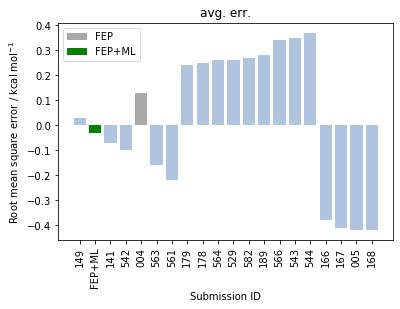

In [44]:
plot_bar(index1=0,
         index2=1,
         title='avg. err.',
         y_label='Average error / kcal mol$^{-1}$')

### RMS

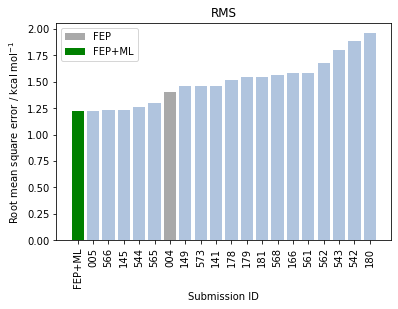

In [45]:
plot_bar(index1=2,
         index2=3,
         title='RMS',
         y_label='Root mean square error / kcal mol$^{-1}$')

### MAE or AUE?

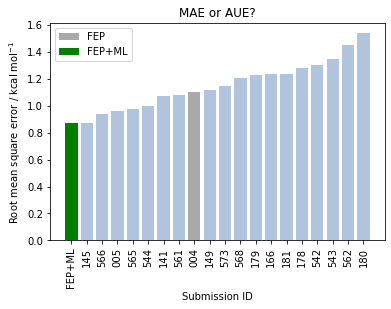

In [46]:
plot_bar(index1=4,
         index2=5,
         title='MAE or AUE?',
         y_label='mean absolute error / kcal mol$^{-1}$')

### tau

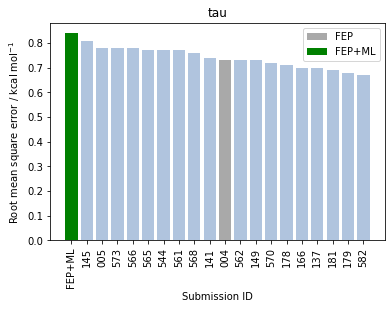

In [47]:
plot_reverse_bar(index1=6,
                 index2=7,
                 title='tau',
                 y_label='Kendall tau / kcal mol$^{-1}$')

### R

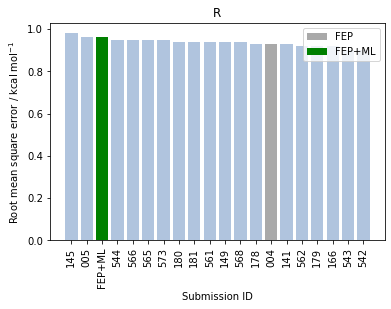

In [48]:
plot_reverse_bar(index1=8,
                 index2=9,
                 title='R',
                 y_label='Pearson R / kcal mol$^{-1}$')